In [2]:
import dask.dataframe as dd
from dask.distributed import Client

In [3]:
client = Client(
    n_workers=4,
    threads_per_worker=2,
    memory_limit='32GB'
)

In [4]:
data_repo = "./data/raw/QUOT_SIM2_previous-2020-202507.csv.gz"

In [5]:
df = dd.read_csv(data_repo ,sep=";",  blocksize=None, assume_missing=True)

In [6]:
df["DATE"] = dd.to_datetime(df["DATE"], format="%Y%m%d", errors="coerce")

In [75]:
df_chamrousse = df[
    (df["LAMBX"] >= 8700) & (df["LAMBX"] <= 8800) &
    (df["LAMBY"] >= 20150) & (df["LAMBY"] <= 20250)
]

In [76]:
df_chamrousse.to_csv("chamrousse_filtered_1980-1989.csv",single_file=True, index=False)

['c:\\Users\\dmitrii.druzhbin\\Documents\\climatest\\dfg\\chamrousse_filtered_1980-1989.csv']

In [1]:
import pandas as pd

In [77]:
df_1 = pd.read_csv('./data/raw/chamrousse_filtered_1980-1989.csv')

In [78]:
df_2 = pd.read_csv('./data/raw/chamrousse_filtered_1990-1999.csv')

In [79]:
df_total = pd.concat([df_1, df_2])

In [84]:
df_next = pd.read_csv('./data/raw/chamrousse_filtered_2020-2025.csv')

In [85]:
df_total = pd.concat([df_total, df_next])

In [86]:
df_total['DATE'] = pd.to_datetime(df_total['DATE'])

In [87]:
df_total = df_total.sort_values(by='DATE')

In [46]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25992 entries, 0 to 4077
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LAMBX          25992 non-null  float64       
 1   LAMBY          25992 non-null  float64       
 2   DATE           25992 non-null  datetime64[ns]
 3   PRENEI_Q       25992 non-null  float64       
 4   PRELIQ_Q       25992 non-null  float64       
 5   T_Q            25992 non-null  float64       
 6   FF_Q           25992 non-null  float64       
 7   Q_Q            25992 non-null  float64       
 8   DLI_Q          25992 non-null  float64       
 9   SSI_Q          25992 non-null  float64       
 10  HU_Q           25992 non-null  float64       
 11  EVAP_Q         25992 non-null  float64       
 12  ETP_Q          25992 non-null  float64       
 13  PE_Q           25992 non-null  float64       
 14  SWI_Q          25992 non-null  float64       
 15  DRAINC_Q       25992 non-

In [47]:
df_total.columns

Index(['LAMBX', 'LAMBY', 'DATE', 'PRENEI_Q', 'PRELIQ_Q', 'T_Q', 'FF_Q', 'Q_Q',
       'DLI_Q', 'SSI_Q', 'HU_Q', 'EVAP_Q', 'ETP_Q', 'PE_Q', 'SWI_Q',
       'DRAINC_Q', 'RUNC_Q', 'RESR_NEIGE_Q', 'RESR_NEIGE6_Q', 'HTEURNEIGE_Q',
       'HTEURNEIGE6_Q', 'HTEURNEIGEX_Q', 'SNOW_FRAC_Q', 'ECOULEMENT_Q',
       'WG_RACINE_Q', 'WGI_RACINE_Q', 'TINF_H_Q', 'TSUP_H_Q'],
      dtype='object')

In [31]:
df_total["MONTH"] = df_total["DATE"].dt.month
df_winter = df_total[(df_total["MONTH"] >= 11) | (df_total["MONTH"] <= 5)]

In [88]:
df_total = df_total[df_total['LAMBY'] == 20170]

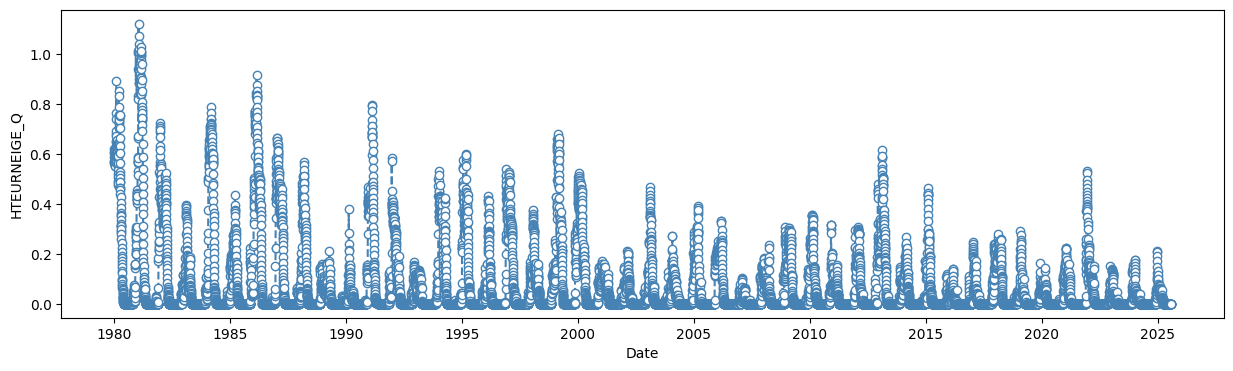

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.plot(df_total.reset_index(drop=True)['DATE'], 
         df_total.reset_index(drop=True)['HTEURNEIGE_Q'], marker='o', 
         color='steelblue', markerfacecolor='white', linestyle='--')
plt.xlabel('Date')
plt.ylabel('HTEURNEIGE_Q');


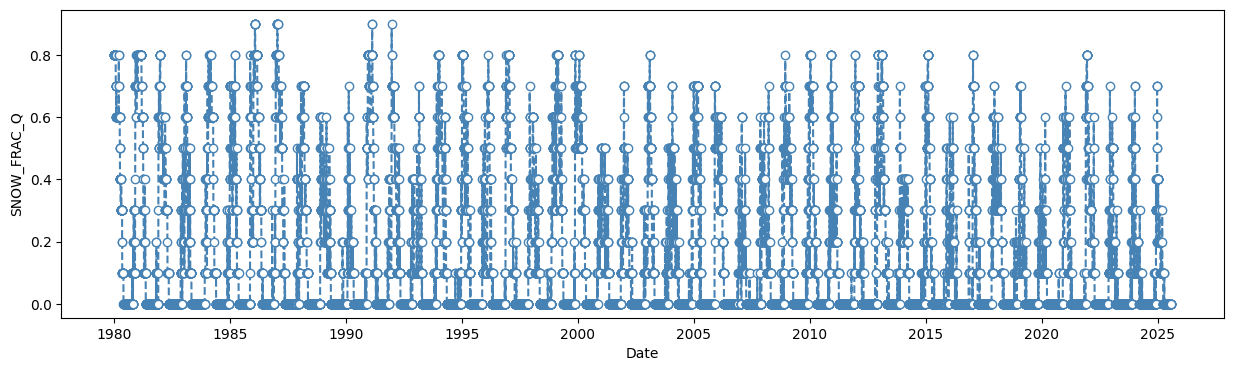

In [90]:
plt.figure(figsize=(15,4))
plt.plot(df_total.reset_index(drop=True)['DATE'], 
         df_total.reset_index(drop=True)['SNOW_FRAC_Q'], marker='o', 
         color='steelblue', markerfacecolor='white', linestyle='--')
plt.xlabel('Date')
plt.ylabel('SNOW_FRAC_Q');

In [91]:
df_total.to_csv('df_total.csv', index=False)